In [13]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import nbformat as nbf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
pio.renderers.default = "browser"

In [14]:
df = pd.read_csv("../data/thyroid_cancer_dataset.csv")[["Family_History","Radiation_Exposure","Iodine_Deficiency","Smoking","Obesity","Diabetes"]]
df

,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes
0,No,Yes,No,No,No,No
1,No,Yes,No,No,No,No
2,No,No,No,No,No,No
3,No,No,No,No,No,No
4,Yes,Yes,No,No,No,No
...,...,...,...,...,...,...
212686,No,No,No,No,Yes,No
212687,No,No,No,No,Yes,No
212688,No,No,No,No,No,Yes
212689,No,No,No,No,No,Yes


In [15]:
def f_rel(df, col):
    return df[col].value_counts(normalize=True).reset_index().rename(columns={"index": col, col: "relative_frequency"})

In [16]:
list_f_rel = []
for col in df.columns:
    rel_df = f_rel(df,col)
    list_f_rel.append((
        col, 
        rel_df[rel_df["relative_frequency"]=="Yes"]["proportion"].values[0], 
        rel_df[rel_df["relative_frequency"]=="No"]["proportion"].values[0] if "No" in rel_df["relative_frequency"].values else 0
        ))
list_f_rel.sort(key=lambda x: x[1], reverse=True)
list_f_rel


[('Obesity', np.float64(0.3003700203581722), np.float64(0.6996299796418278)),
 ('Family_History',
  np.float64(0.3000832193181658),
  np.float64(0.6999167806818342)),
 ('Iodine_Deficiency',
  np.float64(0.24927241867309854),
  np.float64(0.7507275813269014)),
 ('Diabetes', np.float64(0.2002576507703664), np.float64(0.7997423492296336)),
 ('Smoking', np.float64(0.19949598243461172), np.float64(0.8005040175653882)),
 ('Radiation_Exposure',
  np.float64(0.14979477269842165),
  np.float64(0.8502052273015783))]

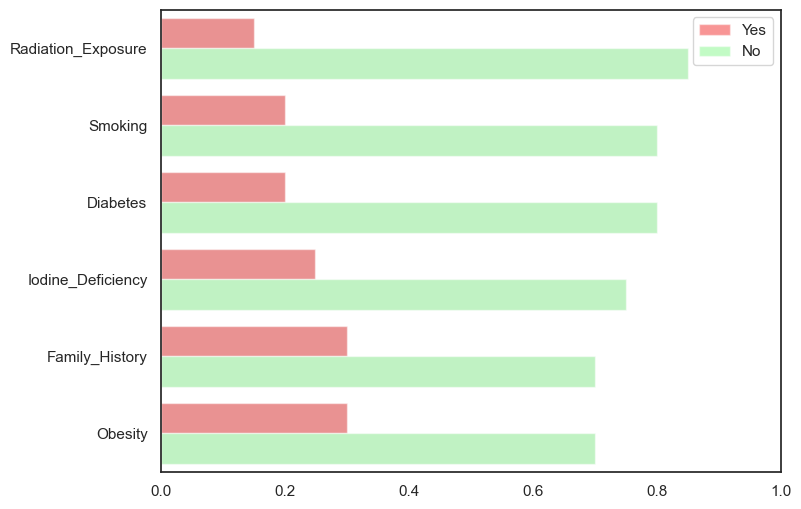

In [25]:
# Grafico a barre orizzontali con seaborn

yes = [x[1] for x in reversed(list_f_rel)]
no  = [x[2] for x in reversed(list_f_rel)]
labels = [x[0] for x in reversed(list_f_rel)]

df_bar = pd.DataFrame({
    'label': labels,
    'Yes': yes,
    'No': no
})

# Converto in formato "long" per Seaborn
df_long = df_bar.melt(id_vars='label', var_name='response', value_name='value')

plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

# Palette personalizzata: Yes = rosso pastello, No = verde pastello
custom_palette = {
    "Yes": "#f1090939",  # rosso pastello
    "No":  "#72f67939"   # verde pastello
}

ax = sns.barplot(
    data=df_long,
    y="label",
    x="value",
    hue="response",
    orient="h",
    palette=custom_palette
)

# Imposto alpha sulle barre
for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.5)

ax.legend_.remove()

# Creo la legenda manuale con alpha corretto
handles = [
    Patch(facecolor="#f10909", alpha=0.43, label="Yes"),
    Patch(facecolor="#72f679", alpha=0.43, label="No")
]
ax.legend(handles=handles, title="")

# plt.legend(title="")
plt.xlabel("")
plt.ylabel("")
plt.xlim(0, 1.0)
plt.show()




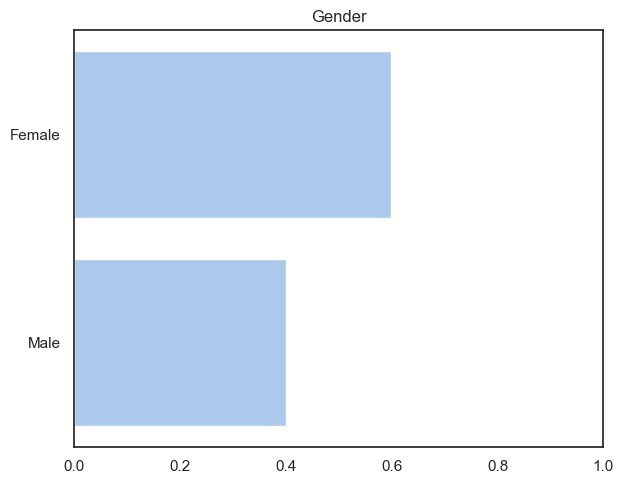

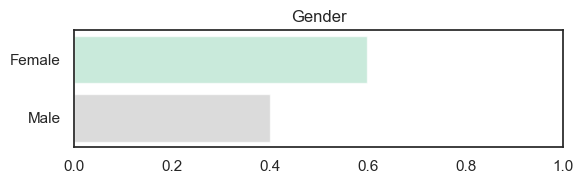

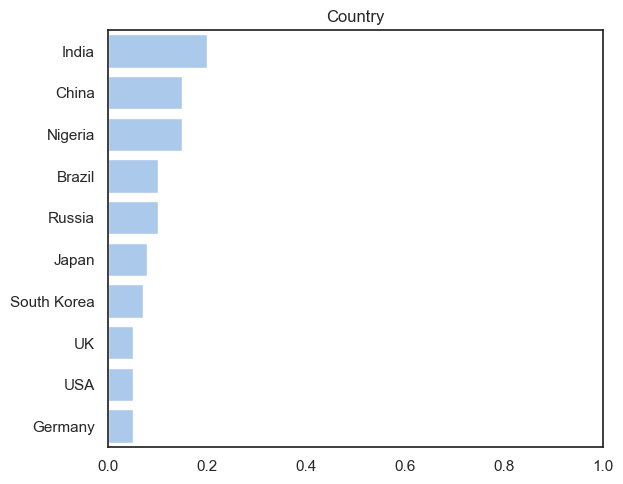

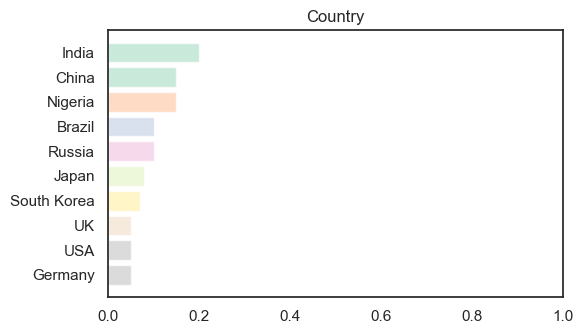

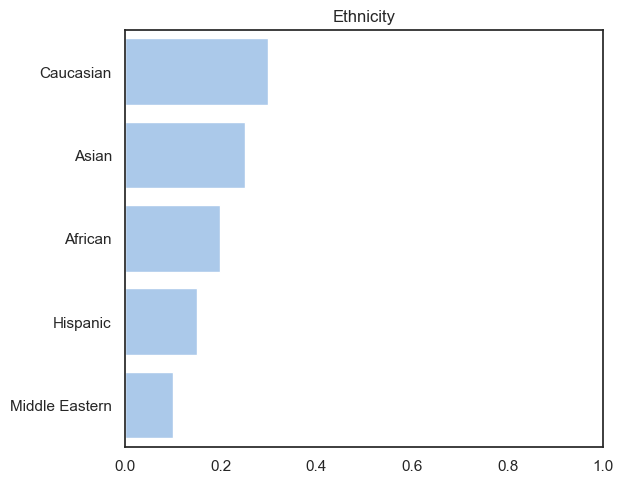

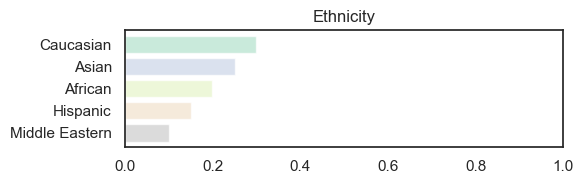

In [24]:
df = pd.read_csv("../data/thyroid_cancer_dataset.csv")[["Gender","Country","Ethnicity"]]

for col in df.columns:
    serie = df[col].value_counts(normalize=True)
    serie.sort_values(inplace=True, ascending=False)
    sns.set_color_codes("pastel")
    sns.barplot(x= serie.values, y= [x for x in list(serie.index)], orient='h', color="b")
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(0, 1.0)
    plt.tight_layout()
    plt.title(col)
    plt.show()

    # Matplotlib equivalente al grafico seaborn precedente
    fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
    labels = list(serie.index)
    values = list(serie.values)
    y_pos = np.arange(len(labels))

    # palette pastel
    cmap = plt.get_cmap("Pastel2")
    colors = [cmap(i / max(1, len(labels) - 1)) for i in range(len(labels))]

    bars = ax.barh(y_pos, values, color=colors, alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # mantengo ordine simile a seaborn
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 1.0)
    ax.set_title(col)
    plt.tight_layout()

    # # Annotazioni percentuali a destra delle barre
    # for bar, val in zip(bars, values):
    #     ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
    #             f"{val:.1%}", va="center", fontsize=9)

    plt.show()

In [27]:
df = pd.read_csv("../data/thyroid_cancer_dataset.csv")[["Age"]]
df["Age"].min(), df["Age"].max()

(np.int64(15), np.int64(89))

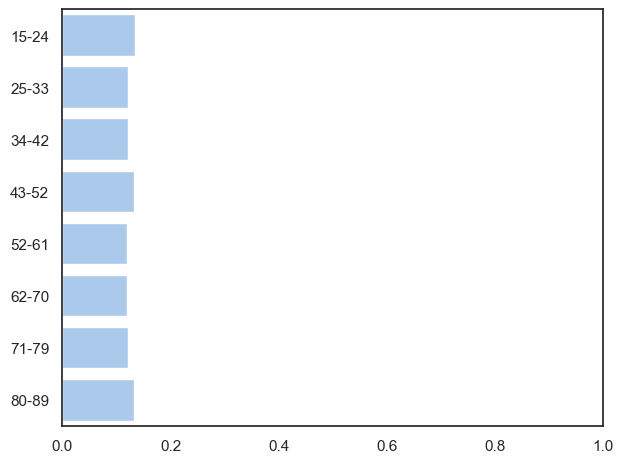

In [32]:
max_age = df["Age"].max()
min_age = df["Age"].min() 


range_df = df["Age"].value_counts(bins=8, normalize=True).sort_index()
range_df.index = [f"{int(np.ceil(iv.left))}-{int(iv.right)}" for iv in range_df.index]
sns.set_color_codes("pastel")
sns.barplot(x= range_df.values, y= [str(x) for x in range_df.index], orient='h', color="b")
plt.xlabel('')  
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.show()

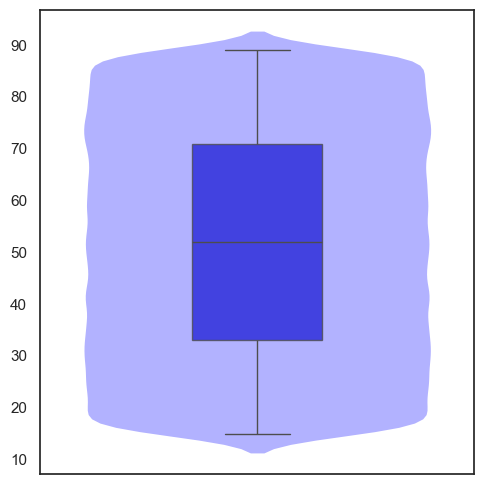

In [33]:
col = "Age"
color = 'blue'

fig, ax = plt.subplots(1, 1, figsize=(5, 5)) 

vp = sns.violinplot(data=df[col], color=color,
                    inner=None, linewidth=0, saturation=1, ax=ax)

for patch in vp.collections:
    patch.set_alpha(0.3)  

bp = sns.boxplot(data=df[col], color=color, width=0.3,
                    boxprops={'zorder': 2}, saturation=0.7, ax=ax)

for patch in bp.patches:
    patch.set_alpha(0.8)

ax.set_ylabel('')   

plt.tight_layout()
plt.show()

In [34]:
df = pd.read_csv("../data/thyroid_cancer_dataset.csv")[["Diagnosis"]]
df["Diagnosis"].unique()

array(['Benign', 'Malignant'], dtype=object)

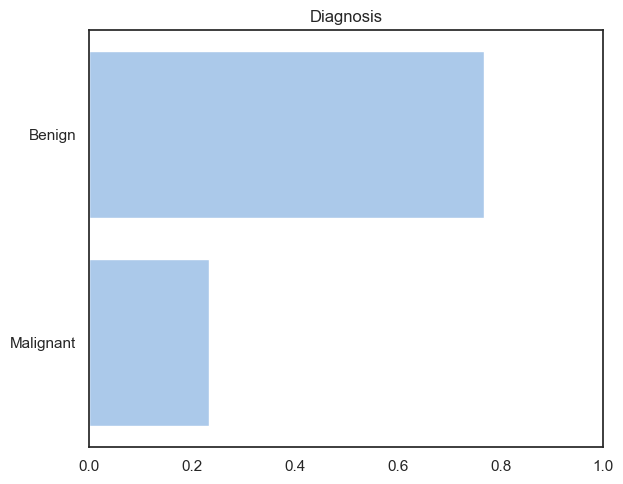

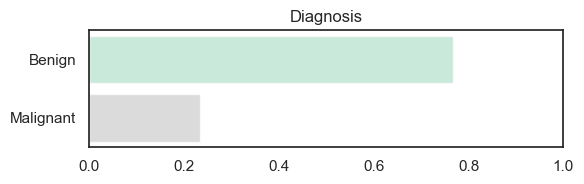

In [35]:
col = "Diagnosis"

serie = df[col].value_counts(normalize=True)
serie.sort_values(inplace=True, ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x= serie.values, y= [x for x in list(serie.index)], orient='h', color="b")
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.title(col)
plt.show()

fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
labels = list(serie.index)
values = list(serie.values)
y_pos = np.arange(len(labels))

# palette pastel
cmap = plt.get_cmap("Pastel2")
colors = [cmap(i / max(1, len(labels) - 1)) for i in range(len(labels))]

bars = ax.barh(y_pos, values, color=colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim(0, 1.0)
ax.set_title(col)
plt.tight_layout()
plt.show()